In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, classification_report, accuracy_score

from scipy.stats import ttest_1samp, zscore


%matplotlib inline
plt.style.use('ggplot')

from utils.clean_utils import reduce_dataframe, clean_dataframe
from utils.model import model_RandomClass

# Evaluating Predictive Power

In [2]:
df = pd.read_csv('data/feats_cleaned.csv')

In [3]:
columns = df.columns
feat_cols = []
for name in columns:
    if name != "structureProteinName" and name != "cellID" and name != "save_feats_path":
        feat_cols.append(name)

In [4]:
# Split to features and labels
X_temp = df[feat_cols]
y = df.structureProteinName

In [5]:
# Normalize so coefficients can be compared
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_temp)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = feat_cols

In [6]:
# Reset X to normalized features
X = df_normalized

In [7]:
# Test Train Split stratified so classes are balanced in split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=.2, stratify=y)

## Estimating distribution of random guess accuracy

In [10]:
accuracy_arr = []

for i in range(10000):
    accuracy_arr.append(accuracy_score(y_true=y_test, y_pred=model_RandomClass(y_test)))

In [21]:
log_reg_acc = 0.3239

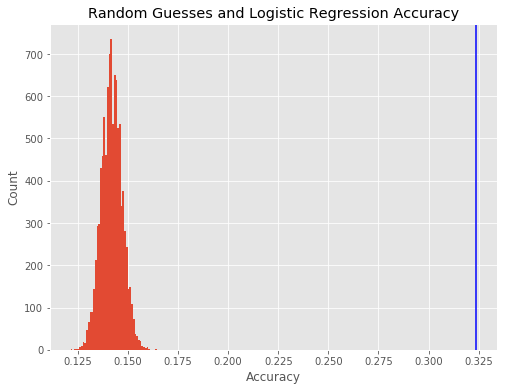

In [22]:
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.hist(accuracy_arr, bins=50)
ax.axvline(x=log_reg_acc, color='blue')

ax.set_title("Random Guesses and Logistic Regression Accuracy")
ax.set_xlabel("Accuracy")
ax.set_ylabel("Count")

In [23]:
ttest_1samp(accuracy_arr, log_reg_acc)

Ttest_1sampResult(statistic=-3492.7693626680948, pvalue=0.0)